This notebook will reproduce the dropout plot in the NANOGrav 15-year GWB paper (Figure 8).

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import json
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [2]:
# load plotting parameters to match the style in the NANOGrav 15-year GWB paper
with open('../ng15_rcparams.json', 'rb') as f:
    plt.rcParams.update(json.load(f))
plt.rcParams['text.latex.preamble'] = (
    r'\usepackage{amsmath}'
    r'\usepackage{amsbsy}'
    r'\DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}'
)

def figsize2(scale):
    fig_width_pt = 513.17 #469.755                  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,1.5*fig_height]
    return fig_size

In [3]:
# loads the dropout factors for CURN and HD correlations from the file dropout_results.txt
data = np.genfromtxt('dropout_results.txt', dtype='S13, f8, f8, f8')

psrnames = [ data[i][0] for i in range(data.shape[0]) ]
Tspans = [ data[i][1] for i in range(data.shape[0]) ]
dropout_curn = [ data[i][2] for i in range(data.shape[0]) ]
dropout_hd = [ data[i][3] for i in range(data.shape[0]) ]

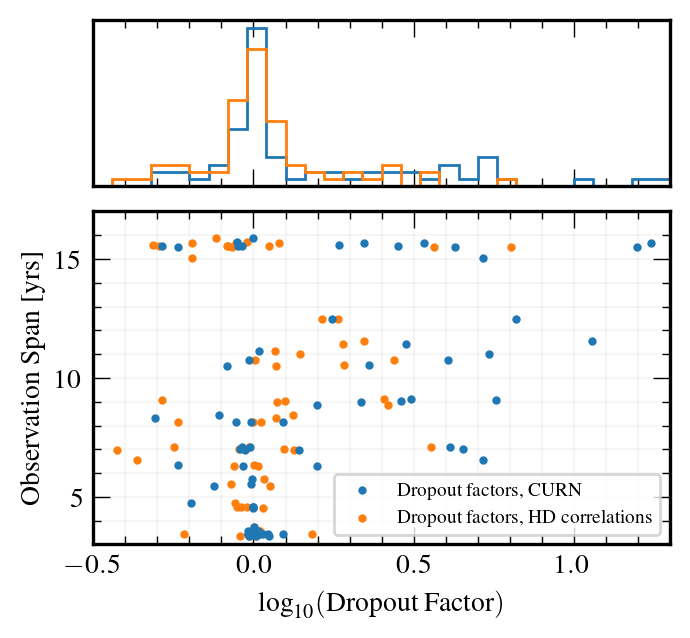

In [4]:
xrange = (-0.5, 1.3)

fig, axs = plt.subplots(2, 1, figsize=figsize2(0.5), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

axs[0].hist(np.log10(dropout_curn), histtype='step', bins=30, density=True, range=xrange)
axs[0].hist(np.log10(dropout_hd), histtype='step', bins=30, density=True, range=xrange)

axs[0].set_yticks([])

axs[1].scatter(np.log10(dropout_curn), Tspans, marker='.', label='Dropout factors, CURN', zorder=10)
axs[1].scatter(np.log10(dropout_hd), Tspans, marker='.', label='Dropout factors, HD correlations', zorder=9)

axs[1].set_ylabel('Observation Span [yrs]')
axs[1].set_xlabel(r'$\log_{10}(\mathrm{Dropout \; Factor})$')

axs[1].set_xlim(xrange)
axs[1].set_ylim((3, 17))

axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())

axs[1].xaxis.grid(True, which='both', alpha=0.1)
axs[1].yaxis.grid(True, which='both', alpha=0.1)

axs[1].legend(loc='best')

plt.tight_layout()

plt.subplots_adjust(hspace=0.1)

plt.show()
# plt.savefig('dropout_scatter_2panel.pdf')